<a href="https://colab.research.google.com/github/Vasudev-SN/MPEA_dataset/blob/master/DNN_SDP_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [12]:
data =pd.read_csv('Minitab.csv')

In [13]:
data

,StdOrder,RunOrder,PtType,Blocks,DOC (mm),Displacement (mm),Rev (rad/s),Stress,Defomation
0,22,1,1,1,6,40,1,6174.00,237.980
1,7,2,1,1,2,60,1,3384.00,211.380
2,20,3,1,1,6,20,2,1740.00,192.560
3,2,4,1,1,2,20,2,1623.80,180.900
4,16,5,1,1,4,60,1,261.20,72.200
5,15,6,1,1,4,40,3,1490.00,142.400
6,6,7,1,1,2,40,3,1288.39,136.181
7,1,8,1,1,2,20,1,1540.00,55.900
8,24,9,1,1,6,40,3,4149.00,227.090
9,3,10,1,1,2,20,3,1522.50,174.810


In [14]:
data=data.iloc[:,4:]

In [15]:
data

,DOC (mm),Displacement (mm),Rev (rad/s),Stress,Defomation
0,6,40,1,6174.00,237.980
1,2,60,1,3384.00,211.380
2,6,20,2,1740.00,192.560
3,2,20,2,1623.80,180.900
4,4,60,1,261.20,72.200
5,4,40,3,1490.00,142.400
6,2,40,3,1288.39,136.181
7,2,20,1,1540.00,55.900
8,6,40,3,4149.00,227.090
9,2,20,3,1522.50,174.810


(array([[27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  2.,  8.,  4.,  3.,  4.,  1.,  1.,  0.,  1.],
        [27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([1.0000e+00, 6.1830e+02, 1.2356e+03, 1.8529e+03, 2.4702e+03,
        3.0875e+03, 3.7048e+03, 4.3221e+03, 4.9394e+03, 5.5567e+03,
        6.1740e+03]),
 <a list of 5 BarContainer objects>)

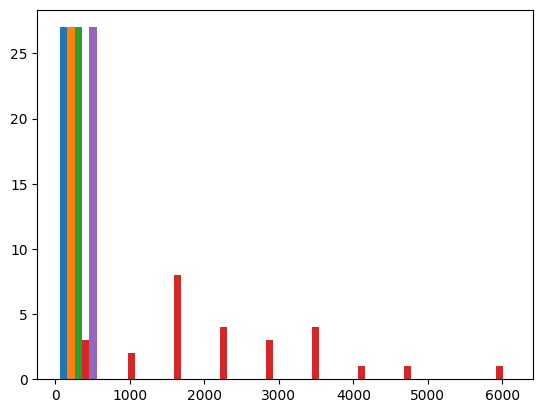

In [16]:
plt.hist(data)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DOC (mm)           27 non-null     int64  
 1   Displacement (mm)  27 non-null     int64  
 2   Rev (rad/s)        27 non-null     int64  
 3   Stress             27 non-null     float64
 4   Defomation         27 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.2 KB


In [18]:
def augment_data(original_data, num_duplicates=10000, noise_factor=0.01):
    augmented_data = original_data.copy()
    for _ in range(num_duplicates):
        new_data_point = original_data.sample().values.flatten()
        noise = np.random.normal(0, noise_factor, size=new_data_point.shape)
        new_data_point += noise
        augmented_data = augmented_data.append(pd.Series(new_data_point, index=augmented_data.columns), ignore_index=True)
    return augmented_data

In [19]:
augmented_data = augment_data(data, num_duplicates=10000)

Streaming output truncated to the last 5000 lines.
<ipython-input-18-8495338ceb66>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(pd.Series(new_data_point, index=augmented_data.columns), ignore_index=True)
<ipython-input-18-8495338ceb66>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(pd.Series(new_data_point, index=augmented_data.columns), ignore_index=True)
<ipython-input-18-8495338ceb66>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(pd.Series(new_data_point, index=augmented_data.columns), ignore_index=True)
<ipython-input-18-8495338ceb66>:7: FutureWarning: The frame.append method is deprecated and wi

In [20]:
augmented_data = pd.concat([data, augmented_data], ignore_index=True)

In [21]:
augmented_data

,DOC (mm),Displacement (mm),Rev (rad/s),Stress,Defomation
0,6.000000,40.000000,1.000000,6174.000000,237.980000
1,2.000000,60.000000,1.000000,3384.000000,211.380000
2,6.000000,20.000000,2.000000,1740.000000,192.560000
3,2.000000,20.000000,2.000000,1623.800000,180.900000
4,4.000000,60.000000,1.000000,261.200000,72.200000
...,...,...,...,...,...
10049,4.016600,60.018718,1.999882,551.072315,197.052907
10050,6.003257,39.989620,0.997714,6174.029330,237.979773
10051,1.992129,39.993845,1.997392,3658.016512,86.118973
10052,1.996076,59.995020,0.994739,3383.999659,211.371399


In [22]:
augmented_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054 entries, 0 to 10053
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DOC (mm)           10054 non-null  float64
 1   Displacement (mm)  10054 non-null  float64
 2   Rev (rad/s)        10054 non-null  float64
 3   Stress             10054 non-null  float64
 4   Defomation         10054 non-null  float64
dtypes: float64(5)
memory usage: 392.9 KB


(array([[10054.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [10054.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [10054.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [ 1094.,   762.,  2950.,  1503.,  1160.,  1489.,   378.,   366.,
             0.,   352.],
        [10054.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]]),
 array([9.66347790e-01, 6.18272646e+02, 1.23557894e+03, 1.85288524e+03,
        2.47019154e+03, 3.08749784e+03, 3.70480414e+03, 4.32211044e+03,
        4.93941673e+03, 5.55672303e+03, 6.17402933e+03]),
 <a list of 5 BarContainer objects>)

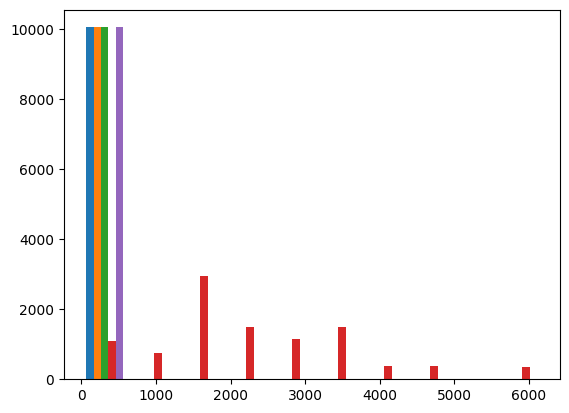

In [23]:
plt.hist(augmented_data)

<Axes: >

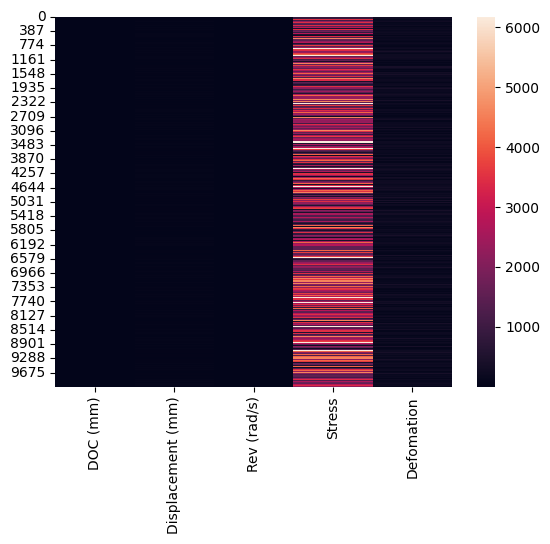

In [58]:
sns.heatmap(augmented_data)

<Axes: >

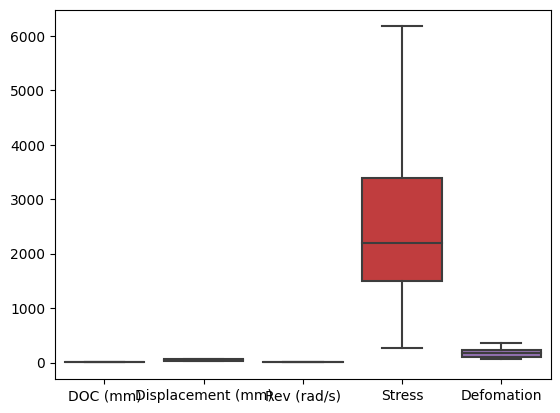

In [59]:
sns.boxplot(augmented_data)

In [25]:
X = augmented_data.drop(['Stress', 'Defomation'], axis=1)
y_stress = augmented_data['Stress']
y_deformation = augmented_data['Defomation']

In [26]:
X_train, X_test, y_stress_train, y_stress_test, y_deformation_train, y_deformation_test = train_test_split(
    X, y_stress, y_deformation, test_size=0.2, random_state=42
)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [29]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [32]:
model.fit(
    X_train_scaled, y_stress_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/100
101/101 [==============================] - 4s 11ms/step - loss: 6949639.0000 - val_loss: 6770986.0000
Epoch 2/100
101/101 [==============================] - 0s 4ms/step - loss: 6722563.5000 - val_loss: 6334829.5000
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 5976040.5000 - val_loss: 5266915.5000
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 4622454.0000 - val_loss: 3728141.7500
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 3084141.0000 - val_loss: 2366956.5000
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 2032055.0000 - val_loss: 1709884.1250
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 1630170.5000 - val_loss: 1536702.2500
Epoch 8/100
101/101 [==============================] - 0s 2ms/step - loss: 1527569.8750 - val_loss: 1485588.6250
Epoch 9/100
101/101 [==============================] - 0s 4ms/step - loss: 1484098.0000 - val_l

In [33]:
predictions_stress = model.predict(X_test_scaled)
mae_stress = mean_absolute_error(y_stress_test, predictions_stress)
mse_stress = mean_squared_error(y_stress_test, predictions_stress)
r2_stress = r2_score(y_stress_test, predictions_stress)

63/63 [==============================] - 0s 1ms/step


In [45]:
predictions_deformation = model.predict(X_test_scaled)

63/63 [==============================] - 0s 4ms/step


In [46]:
model.fit(X_train_scaled, y_deformation_train, epochs=100, batch_size=64)

Epoch 1/100
126/126 [==============================] - 0s 2ms/step - loss: 1431620.3750
Epoch 2/100
126/126 [==============================] - 0s 2ms/step - loss: 499508.9688
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 310743.0625
Epoch 4/100
126/126 [==============================] - 0s 2ms/step - loss: 210996.6875
Epoch 5/100
126/126 [==============================] - 0s 2ms/step - loss: 150945.9062
Epoch 6/100
126/126 [==============================] - 0s 2ms/step - loss: 111379.8984
Epoch 7/100
126/126 [==============================] - 0s 2ms/step - loss: 83873.7812
Epoch 8/100
126/126 [==============================] - 0s 2ms/step - loss: 64955.6367
Epoch 9/100
126/126 [==============================] - 0s 2ms/step - loss: 52047.7188
Epoch 10/100
126/126 [==============================] - 0s 2ms/step - loss: 42858.5781
Epoch 11/100
126/126 [==============================] - 0s 2ms/step - loss: 35996.1211
Epoch 12/100
126/126 [=======================

In [34]:
print("Stress Model:")
print("MAE:", mae_stress)
print("MSE:", mse_stress)
print("R^2:", r2_stress)

Stress Model:
MAE: 117.01368079265407
MSE: 26324.82261557611
R^2: 0.9846864413624974


In [50]:
residuals_stress = y_stress_test.values - predictions_stress.flatten()
residuals_deformation = y_deformation_test.values - predictions_deformation.flatten()


Text(0, 0.5, 'Residuals')

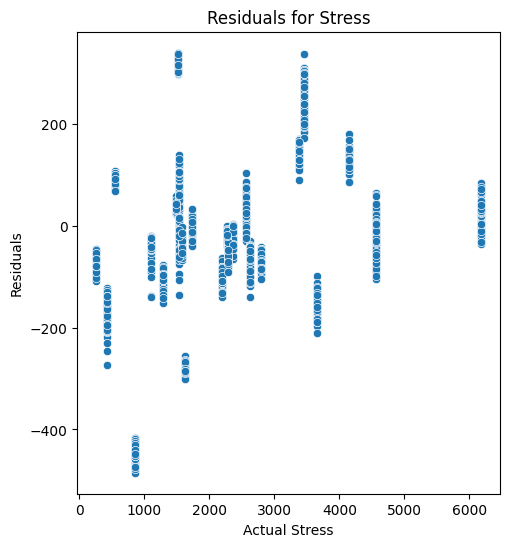

In [52]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_stress_test.values, y=residuals_stress)
plt.title('Residuals for Stress')
plt.xlabel('Actual Stress')
plt.ylabel('Residuals')

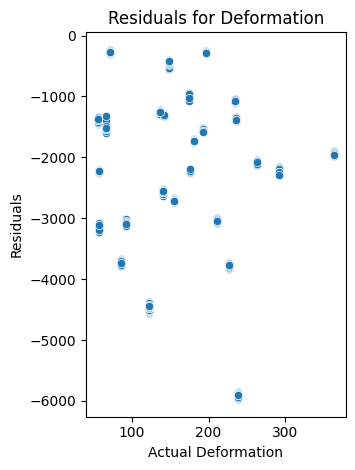

In [53]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_deformation_test.values, y=residuals_deformation)
plt.title('Residuals for Deformation')
plt.xlabel('Actual Deformation')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals for Stress')

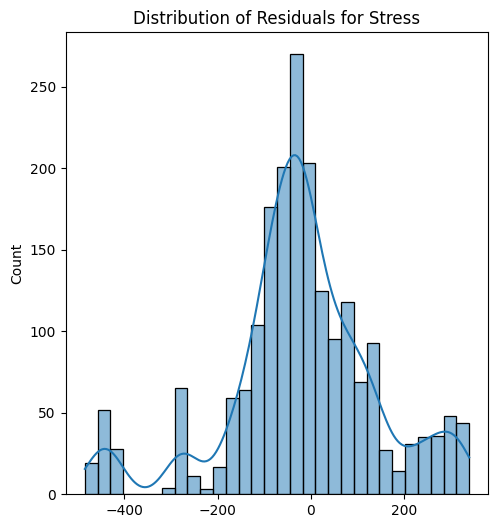

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals_stress, bins=30, kde=True)
plt.title('Distribution of Residuals for Stress')

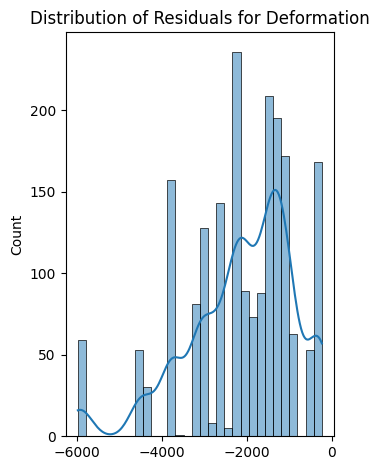

In [55]:
plt.subplot(1, 2, 2)
sns.histplot(residuals_deformation, bins=30, kde=True)
plt.title('Distribution of Residuals for Deformation')

plt.tight_layout()
plt.show()
